<a href="https://colab.research.google.com/github/Hamilton-at-CapU/comp115/blob/main/lessons/lesson04_iteration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iteration

Iteration is the ability to run a block of statements repeatedly. We've already seen a kind of iteration using a `for` loop.  In this lesson we will develop a deeper understanding of the `for` loop and be introduced to another type of loop, called a `while` loop.  But first, we need to understand a little more about sequences and updating variables because they are commonly used in loops.

### Before you begin...

Once again, before working through the lesson, run the following code.

In [114]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

## Sequences

In Python a **collection** is an object that contains other objects.  You can think of it like the English word collection, a car collection is a bunch of cars, a toy collection is a bunch of toys.  Each item stored in the collection is called an **element**.  A **sequence** is type of collection of items arranged in a particular order.  In a sequence you can access each item using an integer **index** that represents its position in the sequence.  We will learn more about collections later; for this lesson we will focus on the basics of two types of sequences, strings and lists.

### Strings
We have already seen one type of sequence, **strings**.  A string is a sequence of characters arranged in a particular order.  A **character** can be a letter (in almost any alphabet), a digit (0-9), a punctuation mark (like !, ?, or @), or a white space (like a space, a tab, or a new line).  Strings are created by putting a bunch of characters inside quotation marks (`'`, or `"`).  

Here is an example of a string.

In [115]:
fruit = 'banana'

### Lists
Like a string, a **list** is a sequence of values. In a string, the
values are characters; in a list, they can be any type.  There are several ways to create a new list; the simplest is to enclose the elements in square brackets (`[` and `]`).

Here is an example of a list of integers.

In [116]:
numbers = [42, 123]

And here is a list of strings.

In [117]:
cheeses = ['Cheddar', 'Edam', 'Gouda']

The elements of a list don't have to be the same type.
The following list contains a string, a float, and an integer.

In [118]:
t = ['spam', 2.0, 5]

Lists can also have no elements, here is an example of an empty list.

In [119]:
empty = []

### Elements are labeled by index
Each element in sequence is labeled with an **index**, starting from 0.   The following figure shows the state diagram for `cheeses`, `numbers` and `empty`.

** ADD banana! TO SHOW THE SIMILARITY TO STRINGS **

In [120]:
from diagram import make_list, Binding, Value

list1 = make_list(cheeses, dy=-0.3, offsetx=0.17)
binding1 = Binding(Value('cheeses'), list1)

list2 = make_list(numbers, dy=-0.3, offsetx=0.17)
binding2 = Binding(Value('numbers'), list2)

list3 = make_list(empty, dy=-0.3, offsetx=0.1)
binding3 = Binding(Value('empty'), list3)

list4 = make_list(fruit, dy=-0.3, offsetx=0.1)
binding4 = Binding(Value('fruit'), list4)

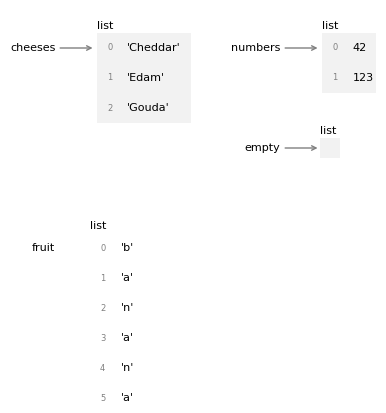

In [121]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [3.66, 1.58, 0.45, 1.2]
ax = diagram(width, height)
bbox1 = binding1.draw(ax, x, y)
bbox2 = binding2.draw(ax, x+2.25, y)
bbox3 = binding3.draw(ax, x+2.25, y-1.0)
bbox4 = binding4.draw(ax, x, y-2.0)

bbox = Bbox.union([bbox1, bbox2, bbox3, bbox4])
#adjust(x, y, bbox)

Notice that the index values go from zero to one less than the number of elements in the list.  In computer programming it is common to start counting from zero, not one.

### Accessing elements by index

You can access an element in a sequence by its index using the bracket operator. The following example uses a string; but the concepts here apply to any sequence.  This example statement selects the character with index 1 from `fruit` and assigns it to `letter`:

In [122]:
letter = fruit[1]

What is the value of `letter`?  

In [123]:
letter

'a'

The value of `letter` is `a` because index counting for sequences starts at 0, not 1.  The "first" element of a sequence has index `0`, so it is often called the 0th (pronounced "zero-eth") element.   

In [124]:
fruit[0]

'b'

This slight shift in language can be a source of considerable confusion for beginner programmers, so be careful whenever you use "first",  "second", "third", etc to talk about the position of an element in a sequence.

The index in brackets can be a variable.  It is common (but not necessary) to use a variable named `i` to denote a variable that represents an index.

In [125]:
i = 1
fruit[i]

'a'

Or an expression that contains variables and operators.

In [126]:
fruit[i+1]

'n'

But the value of the index has to be an integer -- otherwise you get a `TypeError`.

In [127]:
%%expect TypeError

fruit[1.5]

TypeError: string indices must be integers, not 'float'

We can use the built-in function `len` to get the length of a sequence.

In [128]:
n = len(fruit)
n

6

To get the last letter of a string, you might be tempted to write this:

In [129]:
%%expect IndexError

fruit[n]

IndexError: string index out of range

But that causes an `IndexError` because there is no letter in `'banana'` with the index 6. Because we started counting at `0`, the six letters are numbered `0` to `5`. To get the last character, you have to subtract `1` from `n`:

In [130]:
fruit[n-1]

'a'

## `for` Loops

As we have seen earlier; if we want to execute some code a definite number of times, we can use a `for` statement.  Here's a simple example.

In [131]:
for i in range(6):
  print(i)

0
1
2
3
4
5


The first line is a **header** that starts with the `for` statement, followed by the **loop variable** name, then the `in` keyword and a sequence of some kind, finally ending with a colon.  The second line is the **body**, which has to be indented.

The header starts with the keyword `for`, a new variable named `i`, and the keyword, `in`.
It uses the `range` function to create a sequence of six integers, from `0` to `5`.  When it gets to the end of the body, it loops back around to the header. The second time through the loop, it assigns the next value from `range` to `i`, and displays it. This continues until `i` is assigned that last value from `range`, `5`, and the loop ends.


### Loop by Index

We can use a loop over a sequence of integers to access each element in a sequence using the index values.  This is called a **loop by index**.  Here is an example that accesses the value of each element of the `fruit` string by its index:   

In [132]:
for i in range(len(fruit)):
  print(f'fruit[{i}] is {fruit[i]}')

fruit[0] is b
fruit[1] is a
fruit[2] is n
fruit[3] is a
fruit[4] is n
fruit[5] is a


### Loop by Item
We can also loop over the elements of a sequence directly.  This is called a **loop by item**.  Here is an example that accesses the value of each element of the `fruit` string directly by item:

In [133]:
for letter in fruit:
  print(letter)

b
a
n
a
n
a


Notice that I changed the name of the variable from `i` to `letter`, which provides more information about the value it refers to.  The variable defined in a `for` loop is called the **loop variable**.  Note that the loop variable can be any valid variable name, but it helps to choose one that lets you keep track of what it represents. In the loop by index example above, the loop variable is named `i` because it represents an index, in the loop by item example the loop variable is named `letter` because it represents a character.  

Looping by item is typically simpler and less prone to bugs.  However, when you need to refer to multiple elements from a sequence in a single loop (perhaps you want to know the value of both the current element and the next element) or if you need to loop over two sequences in parallel (perhaps you want to relate a list of names to a list of phone numbers).

## Updating variables



As you may have discovered, it is legal to make more than one assignment to the same variable.
A new assignment makes an existing variable refer to a new value (and therefore stop referring to the old value).

For example, here is an initial assignment that creates a variable.

In [134]:
x = 5
x

5

And here is an assignment that changes the value of a variable.

In [135]:
x = 7
x

7

The following figure shows what these assignments looks like in a state diagram.

In [136]:
from diagram import make_rebind, draw_bindings

bindings = make_rebind('x', [5, 7])

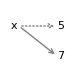

In [137]:
from diagram import diagram, adjust

width, height, x, y = [0.54, 0.61, 0.07, 0.45]
ax = diagram(width, height)
bbox = draw_bindings(bindings, ax, x, y)
# adjust(x, y, bbox)

The dotted arrow indicates that `x` no longer refers to `5`.
The solid arrow indicates that it now refers to `7`.

A common kind of assignment is an **update**, where the new value of
the variable depends on the old.

In [138]:
x = 7

In [139]:
x = x + 1
x

8

This statement means "get the current value of `x`, add one, and assign the result back to `x`."

If you try to update a variable that doesn't exist, you get an error, because Python evaluates the expression on the right before it assigns a value to the variable on the left.

In [140]:
%%expect NameError

z = z + 1

Before you can update a variable, you have to **initialize** it, usually
with a simple assignment:

In [141]:
z = 0
z = z + 1
z

1

Increasing the value of a variable is called an **increment**; decreasing the value is called a **decrement**.
Because these operations are so common, Python provides **augmented assignment operators** that update a variable more concisely.
For example, the `+=` operator increments a variable by the given amount.

In [142]:
z += 2
z

3

There are augmented assignment operators for the other arithmetic operators, including `-=` and `*=`.

## `while` loops

The `while` statement allows us to repeat some code an indefinite number of times. A `while` loop continues to execute the loop body 'while' some condition is satisfied, rather the 'for' a specified number of times.  Like `for` loops, the loop body is defined by indentation, unlike `for` loops, updating variables is an important component of the loop body.  Here is an example of a `while` loop that counts down from `n`:


In [143]:
n = 10
print(f'Starting Countdown from {n}...')
while n > 0:
  print(f'{n}')
  n = n - 1
print('Blastoff!')

Starting Countdown from 10...
10
9
8
7
6
5
4
3
2
1
Blastoff!


You can almost read the while statement as if it were English. It means, “While n is greater than 0, display the value of n and then decrement n. When you get to 0, display the word Blastoff!”.  In this example, `n > 0` is the condition, lines 4-5 are the loop body.

More formally, here is the flow of execution for a while statement:
1.  Determine whether the condition is `True` or `False`.
2.  If the condition is `False`, exit the while statement and continue execution at the statement after the end of the loop body.
3.  If the condition is `True`, execute the body of the loop and then go back to step 1.

The body of the loop should update the value of one or more variables so that the condition becomes false eventually and the loop terminates. Otherwise the loop will repeat forever, which is called an **infinite loop**. An endless source of amusement for computer scientists is the observation that the directions on shampoo, “Lather, rinse, repeat”, are an infinite loop.  In the case of countdown, we can see that the loop terminates: if n is zero or negative, the loop never runs. Otherwise, n gets smaller each time through the loop, so eventually we have to get to 0.

### Move this to an example or exercise...
For some other loops, it is not so easy to tell if they will terminate. It is written as a function just to clarify that `n` is a parameter of the algorithm.  For example:


In [144]:
def sequence(n):
    while n != 1:
        print(n)
        if n % 2 == 0:        # n is even
            n = n / 2
        else:                 # n is odd
            n = n*3 + 1



The condition for this loop is `n != 1`, so the loop will continue until `n` is `1`, which makes the condition `False`.

Each time through the loop, the program outputs the value of `n` and then checks whether it is even or odd. If it is even, `n` is divided by 2. If it is odd, the value of `n` is replaced with `n*3 + 1`. For example, if the argument passed to sequence is 3, the resulting values of `n` are 3, 10, 5, 16, 8, 4, 2, 1.

Since `n` sometimes increases and sometimes decreases, there is no obvious proof that `n` will ever reach `1`, or that the program terminates. For some particular values of `n`, we can prove termination. For example, if the starting value is a power of two, `n` will be even every time through the loop until it reaches `1`. You can try this for yourself by calling the function with `n=16`.

The hard question is whether we can prove that this program terminates for all positive values of `n`. So far, no one has been able to prove it or disprove it! (See http://en.wikipedia.org/wiki/Collatz_conjecture.)

## Counter Algorithms

Counter patterns are common uses of both `for` and `while` loops.  As the name suggests, a counter simply counts something.  Here is an example of a simple counter that counts the number of letters in `fruit`:

In [145]:
count = 0
for letter in fruit:
  count += 1
print(f'There are {count} letters in {fruit}')

There are 6 letters in banana


The characteristic parts of a counter algorithm are; the initialization of the counter (line 1), the loop over the things being counted (line 2), and the increment of the counter (line 3).  Remember that `count += 1` is short for `count = count + 1`.  The built-in function `len` is a counter algorithm that does the same thing as our counter above.

A counter algorithm can also be used to count a selection of the elements in a sequence.  Her is an example that counts the number of 'a's in `fruit`:

In [208]:
count = 0
for letter in fruit:
  if letter == 'a':
    count += 1
print(f"There are {count} a's in {fruit}")

There are 3 a's in banana


We could write this as a function that counts the number of times a character appears in a word:

In [213]:
def letter_count(word, character):
  ''' return the number of times character appears in word '''
  count = 0
  for letter in word:
    if letter == character:
      count += 1
  return count

word = 'Flying Circus'
character = 'i'
print(f"There are {letter_count(word, character)} {character}'s in {word}")

There are 2 i's in Flying Circus


Note that this implementation of a letter counter will be case sensitive, so it will give a potentially confusing result:

In [214]:
word = 'Flying Circus'
character = 'c'
print(f"There are {letter_count(word, character)} {character}'s in {word}")

There are 1 c's in Flying Circus


There are, of course, 2 c's in 'Circus', but because the equality operator `==` is case sensitive, so it only evaluates to `True` for the lower case 'c'.  We will see ways to handle these small challenges later, for now, we can see that a counter can count a selection of elements in a sequence when it is combined with an `if` condition.

## Linear Search Algorithm

A **search algorithm** is an algorithm that searches for a particular value in a collection. Here is an example of a **linear search algorithm** that iterates through each element of a sequence and returns `True` if character is contained in a word and `False` otherwise.  

In [215]:
def contains(word, character):
  ''' return True if character is in word, otherwise return False '''
  for letter in word:
      if letter == character:
          return True
  return False

Here's an example where the result is `True`.

In [216]:
contains('banana', 'a')

True

And another where it is `False`.

In [217]:
contains('apple', 'z')

False

The `contains` function loops through the letters in `word` and checks each letter, one at a time. If a letter is equal to `character`, it returns `True` immediately. If it finishes the loop without finding a letter equal to `character`, then it returns `False`.

A common mistake in writing linear search algorithms is to write something like this:


In [218]:
def incorrect_contains(word, character):
  ''' return True if character is in word, otherwise return False '''
  for letter in word:
    if letter == character:
      return True
    else:
      return False

Can you see what is wrong with the above algorithm?  If you can't see what is wrong, try asking an virtual assistant.

# ORIGINAL TEXT BELOW: DELETE AS YOU GO...

# Iteration and Search

In 1939 Ernest Vincent Wright published a 50,000 word novel called *Gadsby* that does not contain the letter "e". Since "e" is the most common letter in English, writing even a few words without using it is difficult.
To get a sense of how difficult, in this chapter we'll compute the fraction of English words have at least one "e".

For that, we'll use `for` statements to loop through the letters in a string and the words in a file, and we'll update variables in a loop to count the number of words that contain an "e".
We'll use the `in` operator to check whether a letter appears in a word, and you'll learn a programming pattern called a "linear search".

As an exercise, you'll use these tools to solve a word puzzle called "Spelling Bee".

## Loops and strings

In Chapter 3 we saw a `for` loop that uses the `range` function to display a sequence of numbers.

In [146]:
for i in range(3):
    print(i, end=' ')

0 1 2 

This version uses the keyword argument `end` so the `print` function puts a space after each number rather than a newline.

We can also use a `for` loop to display the letters in a string.

In [147]:
for letter in 'Gadsby':
    print(letter, end=' ')

G a d s b y 

Notice that I changed the name of the variable from `i` to `letter`, which provides more information about the value it refers to.
The variable defined in a `for` loop is called the **loop variable**.

Now that we can loop through the letters in a word, we can check whether it contains the letter "e".

In [148]:
for letter in "Gadsby":
    if letter == 'E' or letter == 'e':
        print('This word has an "e"')

Before we go on, let's encapsulate that loop in a function.

In [149]:
def has_e():
    for letter in "Gadsby":
        if letter == 'E' or letter == 'e':
            print('This word has an "e"')

And let's make it a pure function that return `True` if the word contains an "e" and `False` otherwise.

In [150]:
def has_e():
    for letter in "Gadsby":
        if letter == 'E' or letter == 'e':
            return True
    return False

We can generalize it to take the word as a parameter.

In [151]:
def has_e(word):
    for letter in word:
        if letter == 'E' or letter == 'e':
            return True
    return False

Now we can test it like this:

In [152]:
has_e('Gadsby')

False

In [153]:
has_e('Emma')

True

## Reading the word list

To see how many words contain an "e", we'll need a word list.
The one we'll use is a list of about 114,000 official crosswords; that is, words that are considered valid in crossword puzzles and other word games.

The following cell downloads the word list, which is a modified version of a list collected and contributed to the public domain by Grady Ward as part of the Moby lexicon project (see <http://wikipedia.org/wiki/Moby_Project>).

In [154]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

The word list is in a file called `words.txt`, which is downloaded in the notebook for this chapter.
To read it, we'll use the built-in function `open`, which takes the name of the file as a parameter and returns a **file object** we can use to read the file.

In [155]:
file_object = open('words.txt')

The file object provides a function called `readline`, which reads characters from the file until it gets to a newline and returns the result as a string:

In [156]:
file_object.readline()

'aa\n'

Notice that the syntax for calling `readline` is different from functions we've seen so far. That's because it is a **method**, which is a function associated with an object.
In this case `readline` is associated with the file object, so we call it using the name of the object, the dot operator, and the name of the method.

The first word in the list is "aa", which is a kind of lava.
The sequence `\n` represents the newline character that separates this word from the next.

The file object keeps track of where it is in the file, so if you call
`readline` again, you get the next word:

In [157]:
line = file_object.readline()
line

'aah\n'

To remove the newline from the end of the word, we can use `strip`, which is a method associated with strings, so we can call it like this.

In [158]:
word = line.strip()
word

'aah'

`strip` removes whitespace characters -- including spaces, tabs, and newlines -- from the beginning and end of the string.

You can also use a file object as part of a `for` loop.
This program reads `words.txt` and prints each word, one per line:

In [ ]:
for line in open('words.txt'):
    word = line.strip()
    print(word)

Now that we can read the word list, the next step is to count them.
For that, we will need the ability to update variables.

## Looping and counting

The following program counts the number of words in the word list.

In [160]:
total = 0

for line in open('words.txt'):
    word = line.strip()
    total += 1

It starts by initializing `total` to `0`.
Each time through the loop, it increments `total` by `1`.
So when the loop exits, `total` refers to the total number of words.

In [161]:
total

113783

A variable like this, used to count the number of times something happens, is called a **counter**.

We can add a second counter to the program to keep track of the number of words that contain an "e".

In [162]:
total = 0
count = 0

for line in open('words.txt'):
    word = line.strip()
    total = total + 1
    if has_e(word):
        count += 1

Let's see how many words contain an "e".

In [163]:
count

76162

As a percentage of `total`, about two-thirds of the words use the letter "e".

In [164]:
count / total * 100

66.93618554617122

So you can understand why it's difficult to craft a book without using any such words.

## The in operator

The version of `has_e` we wrote in this chapter is more complicated than it needs to be.
Python provides an operator, `in`,  that checks whether a character appears in a string.

In [165]:
word = 'Gadsby'
'e' in word

False

So we can rewrite `has_e` like this.

In [166]:
def has_e(word):
    if 'E' in word or 'e' in word:
        return True
    else:
        return False

And because the conditional of the `if` statement has a boolean value, we can eliminate the `if` statement and return the boolean directly.

In [167]:
def has_e(word):
    return 'E' in word or 'e' in word

We can simplify this function even more using the method `lower`, which converts the letters in a string to lowercase.
Here's an example.

In [168]:
word.lower()

'gadsby'

`lower` makes a new string -- it does not modify the existing string -- so the value of `word` is unchanged.

In [169]:
word

'Gadsby'

Here's how we can use `lower` in `has_e`.

In [170]:
def has_e(word):
    return 'e' in word.lower()

In [171]:
has_e('Gadsby')

False

In [172]:
has_e('Emma')

True

## Doctest

In [Chapter 4](section_docstring) we used a docstring to document a function -- that is, to explain what it does.
It is also possible to use a docstring to *test* a function.
Here's a version of `uses_any` with a docstring that includes tests.

In [177]:
def uses_any(word, letters):
    """Checks if a word uses any of a list of letters.

    >>> uses_any('banana', 'aeiou')
    True
    >>> uses_any('apple', 'xyz')
    False
    """
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

Each test begins with `>>>`, which is used as a prompt in some Python environments to indicate where the user can type code.
In a doctest, the prompt is followed by an expression, usually a function call.
The following line indicates the value the expression should have if the function works correctly.

In the first example, `'banana'` uses `'a'`, so the result should be `True`.
In the second example, `'apple'` does not use any of `'xyz'`, so the result should be `False`.

To run these tests, we have to import the `doctest` module and run a function called `run_docstring_examples`.
To make this function easier to use, I wrote the following function, which takes a function object as an argument.

In [178]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

We haven't learned about `globals` and `__name__` yet -- you can ignore them.
Now we can test `uses_any` like this.

In [179]:
run_doctests(uses_any)

`run_doctests` finds the expressions in the docstring and evaluates them.
If the result is the expected value, the test **passes**.
Otherwise it **fails**.

If all tests pass, `run_doctests` displays no output -- in that case, no news is good news.
To see what happens when a test fails, here's an incorrect version of `uses_any`.

In [180]:
def uses_any_incorrect(word, letters):
    """Checks if a word uses any of a list of letters.

    >>> uses_any_incorrect('banana', 'aeiou')
    True
    >>> uses_any_incorrect('apple', 'xyz')
    False
    """
    for letter in word.lower():
        if letter in letters.lower():
            return True
        else:
            return False     # INCORRECT!

And here's what happens when we test it.

In [181]:
run_doctests(uses_any_incorrect)

**********************************************************************
File "__main__", line 4, in uses_any_incorrect
Failed example:
    uses_any_incorrect('banana', 'aeiou')
Expected:
    True
Got:
    False


The output includes the example that failed, the value the function was expected to produce, and the value the function actually produced.

If you are not sure why this test failed, you'll have a chance to debug it as an exercise.

## Glossary

**loop variable:**
A variable defined in the header of a `for` loop.

**file object:**
An object that represents an open file and keeps track of which parts of the file have been read or written.

**method:**
 A function that is associated with an object and called using the dot operator.

**update:**
An assignment statement that give a new value to a variable that already exists, rather than creating a new variables.

**initialize:**
Create a new variable and give it a value.

**increment:**
Increase the value of a variable.

**decrement:**
Decrease the value of a variable.

**counter:**
 A variable used to count something, usually initialized to zero and then incremented.

**linear search:**
A computational pattern that searches through a sequence of elements and stops when it finds what it is looking for.

**pass:**
If a test runs and the result is as expected, the test passes.

**fail:**
If a test runs and the result is not as expected, the test fails.

## Exercises

In [182]:
# This cell tells Jupyter to provide detailed debugging information
# when a runtime error occurs. Run it before working on the exercises.

%xmode Verbose

Exception reporting mode: Verbose


### Ask a virtual assistant

In `uses_any`, you might have noticed that the first `return` statement is inside the loop and the second is outside.

In [183]:
def uses_any(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
    return False

When people first write functions like this, it is a common error to put both `return` statements inside the loop, like this.

In [184]:
def uses_any_incorrect(word, letters):
    for letter in word.lower():
        if letter in letters.lower():
            return True
        else:
            return False     # INCORRECT!

Ask a virtual assistant what's wrong with this version.

### Exercise

Write a function named `uses_none` that takes a word and a string of forbidden letters, and returns `True` if the word does not use any of the forbidden letters.

Here's an outline of the function that includes two doctests.
Fill in the function so it passes these tests, and add at least one more doctest.

In [185]:
def uses_none(word, forbidden):
    """Checks whether a word avoid forbidden letters.

    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    """
    return None

In [186]:
# Solution goes here

In [187]:
run_doctests(uses_none)

**********************************************************************
File "__main__", line 4, in uses_none
Failed example:
    uses_none('banana', 'xyz')
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in uses_none
Failed example:
    uses_none('apple', 'efg')
Expected:
    False
Got nothing


### Exercise

Write a function called `uses_only` that takes a word and a string of letters, and that returns `True` if the word contains only letters in the string.

Here's an outline of the function that includes two doctests.
Fill in the function so it passes these tests, and add at least one more doctest.

In [188]:
def uses_only(word, available):
    """Checks whether a word uses only the available letters.

    >>> uses_only('banana', 'ban')
    True
    >>> uses_only('apple', 'apl')
    False
    """
    return None

In [189]:
# Solution goes here

In [190]:
run_doctests(uses_only)

**********************************************************************
File "__main__", line 4, in uses_only
Failed example:
    uses_only('banana', 'ban')
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in uses_only
Failed example:
    uses_only('apple', 'apl')
Expected:
    False
Got nothing


### Exercise

Write a function called `uses_all` that takes a word and a string of letters, and that returns `True` if the word contains all of the letters in the string at least once.

Here's an outline of the function that includes two doctests.
Fill in the function so it passes these tests, and add at least one more doctest.

In [191]:
def uses_all(word, required):
    """Checks whether a word uses all required letters.

    >>> uses_all('banana', 'ban')
    True
    >>> uses_all('apple', 'api')
    False
    """
    return None

In [192]:
# Solution goes here

In [193]:
run_doctests(uses_all)

**********************************************************************
File "__main__", line 4, in uses_all
Failed example:
    uses_all('banana', 'ban')
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in uses_all
Failed example:
    uses_all('apple', 'api')
Expected:
    False
Got nothing


### Exercise

*The New York Times* publishes a daily puzzle called "Spelling Bee" that challenges readers to spell as many words as possible using only seven letters, where one of the letters is required.
The words must have at least four letters.

For example, on the day I wrote this, the letters were `ACDLORT`, with `R` as the required letter.
So "color" is an acceptable word, but "told" is not, because it does not use `R`, and "rat" is not because it has only three letters.
Letters can be repeated, so "ratatat" is acceptable.

Write a function called `check_word` that checks whether a given word is acceptable.
It should take as parameters the word to check, a string of seven available letters, and a string containing the single required letter.
You can use the functions you wrote in previous exercises.

Here's an outline of the function that includes doctests.
Fill in the function and then check that all tests pass.

In [194]:
def check_word(word, available, required):
    """Check whether a word is acceptable.

    >>> check_word('color', 'ACDLORT', 'R')
    True
    >>> check_word('ratatat', 'ACDLORT', 'R')
    True
    >>> check_word('rat', 'ACDLORT', 'R')
    False
    >>> check_word('told', 'ACDLORT', 'R')
    False
    >>> check_word('bee', 'ACDLORT', 'R')
    False
    """
    return False

In [195]:
# Solution goes here

In [196]:
run_doctests(check_word)

**********************************************************************
File "__main__", line 4, in check_word
Failed example:
    check_word('color', 'ACDLORT', 'R')
Expected:
    True
Got:
    False
**********************************************************************
File "__main__", line 6, in check_word
Failed example:
    check_word('ratatat', 'ACDLORT', 'R')
Expected:
    True
Got:
    False


According to the "Spelling Bee" rules,

* Four-letter words are worth 1 point each.

* Longer words earn 1 point per letter.

* Each puzzle includes at least one "pangram" which uses every letter. These are worth 7 extra points!

Write a function called `score_word` that takes a word and a string of available letters and returns its score.
You can assume that the word is acceptable.

Again, here's an outline of the function with doctests.

In [197]:
def word_score(word, available):
    """Compute the score for an acceptable word.

    >>> word_score('card', 'ACDLORT')
    1
    >>> word_score('color', 'ACDLORT')
    5
    >>> word_score('cartload', 'ACDLORT')
    15
    """
    return 0

In [198]:
# Solution goes here

In [199]:
run_doctests(word_score)

**********************************************************************
File "__main__", line 4, in word_score
Failed example:
    word_score('card', 'ACDLORT')
Expected:
    1
Got:
    0
**********************************************************************
File "__main__", line 6, in word_score
Failed example:
    word_score('color', 'ACDLORT')
Expected:
    5
Got:
    0
**********************************************************************
File "__main__", line 8, in word_score
Failed example:
    word_score('cartload', 'ACDLORT')
Expected:
    15
Got:
    0


When all of your functions pass their tests, use the following loop to search the word list for acceptable words and add up their scores.

In [200]:
available = 'ACDLORT'
required = 'R'

total = 0

file_object = open('words.txt')
for line in file_object:
    word = line.strip()
    if check_word(word, available, required):
        score = word_score(word, available)
        total = total + score
        print(word, score)

print("Total score", total)

Total score 0


Visit the "Spelling Bee" page at <https://www.nytimes.com/puzzles/spelling-bee> and type in the available letters for the day. The letter in the middle is required.

I found a set of letters that spells words with a total score of 5820. Can you beat that? Finding the best set of letters might be too hard -- you have to be a realist.

### Exercise

You might have noticed that the functions you wrote in the previous exercises had a lot in common.
In fact, they are so similar you can often use one function to write another.

For example, if a word uses none of a set forbidden letters, that means it doesn't use any. So we can write a version of `uses_none` like this.

In [201]:
def uses_none(word, forbidden):
    """Checks whether a word avoids forbidden letters.

    >>> uses_none('banana', 'xyz')
    True
    >>> uses_none('apple', 'efg')
    False
    >>> uses_none('', 'abc')
    True
    """
    return not uses_any(word, forbidden)

In [202]:
run_doctests(uses_none)

There is also a similarity between `uses_only` and `uses_all` that you can take advantage of.
If you have a working version of `uses_only`, see if you can write a version of `uses_all` that calls `uses_only`.

### Exercise

If you got stuck on the previous question, try asking a virtual assistant, "Given a function, `uses_only`, which takes two strings and checks that the first uses only the letters in the second, use it to write `uses_all`, which takes two strings and checks whether the first uses all the letters in the second, allowing repeats."

Use `run_doctests` to check the answer.

In [203]:
# Solution goes here

In [204]:
run_doctests(uses_all)

**********************************************************************
File "__main__", line 4, in uses_all
Failed example:
    uses_all('banana', 'ban')
Expected:
    True
Got nothing
**********************************************************************
File "__main__", line 6, in uses_all
Failed example:
    uses_all('apple', 'api')
Expected:
    False
Got nothing


### Exercise

Now let's see if we can write `uses_all` based on `uses_any`.

Ask a virtual assistant, "Given a function, `uses_any`, which takes two strings and checks whether the first uses any of the letters in the second, can you use it to write `uses_all`, which takes two strings and checks whether the first uses all the letters in the second, allowing repeats."

If it says it can, be sure to test the result!

In [205]:
# Solution goes here

In [206]:
# Here's what I got from ChatGPT 4o December 26, 2024
# It's correct, but it makes multiple calls to uses_any

def uses_all(s1, s2):
    """Checks if all characters in s2 are in s1, allowing repeats."""
    for char in s2:
        if not uses_any(s1, char):
            return False
    return True


In [207]:
# Solution goes here

[Think Python: 3rd Edition](https://allendowney.github.io/ThinkPython/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)